### Superstore analysis Data visualization

#### Insights

- From the Pie, we can observe that the highest performing segment is **Consumer** recording the highes percentage of Sales.  

- Bar chart analyses the 'Sales per Categories of Product' where **Technology** account for the highes sales followed by **Furniture** and **Office Supplies**.

- Box plot displays the outliers in teh office adn technology categories showing that there were higher discount for some products of the aforementioned categories as compared to Furniture. The **Furniture** distrbution of discount shows a left skewness which means the discount are concentrated towards the higer side.

- Area chart illuminates the Quantity of orders across regions. East and West happens to be performing well as compared to Central and South regions.

- Quantity of shipping over time can be seen in the line chart. We can notice a peak of shipping orders during 2017 followed by a huge decline in 2018 which can be attributed to pandemic reasons also.

- General analysis of Quantity distribution show to be right skewed which translates that low quantities were ordered in high frequencies.

- Scatter plot shows that there is no relationship between the Sales and Quantity.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing dataset

In [4]:
df = pd.read_csv(r"C:\Users\vivek\OneDrive\Desktop\P03EH23M015132_Vivek Pradhan\superstore_Dataset (1).csv")
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
1381,1382,CA-2014-154158,23-12-2014,27-12-2014,Second Class,CC-12670,Craig Carreira,Consumer,United States,Tampa,Florida,33614,South,OFF-AR-10001868,Office Supplies,Art,Prang Dustless Chalk Sticks,1.344,1,0.2


In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         1993 non-null   int64  
 1   Order ID       1993 non-null   object 
 2   Order Date     1993 non-null   object 
 3   Ship Date      1993 non-null   object 
 4   Ship Mode      1993 non-null   object 
 5   Customer ID    1993 non-null   object 
 6   Customer Name  1993 non-null   object 
 7   Segment        1993 non-null   object 
 8   Country        1993 non-null   object 
 9   City           1993 non-null   object 
 10  State          1993 non-null   object 
 11  Postal Code    1993 non-null   int64  
 12  Region         1993 non-null   object 
 13  Product ID     1993 non-null   object 
 14  Category       1993 non-null   object 
 15  Sub-Category   1993 non-null   object 
 16  Product Name   1993 non-null   object 
 17  Sales          1993 non-null   float64
 18  Quantity

In [7]:
df.corr(numeric_only = True)

,Row ID,Postal Code,Sales,Quantity,Discount
Row ID,1.000000,0.019650,-0.020281,-0.020172,-0.057731
Postal Code,0.019650,1.000000,-0.000166,0.011140,0.078618
Sales,-0.020281,-0.000166,1.000000,0.215717,-0.051460
Quantity,-0.020172,0.011140,0.215717,1.000000,-0.008944
Discount,-0.057731,0.078618,-0.051460,-0.008944,1.000000


In [8]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
551,552,CA-2014-140473,30-05-2014,03-06-2014,Standard Class,MC-17425,Mark Cousins,Corporate,United States,Chicago,Illinois,60623,Central,TEC-CO-10004202,Technology,Copiers,Brother DCP1000 Digital 3 in 1 Multifunction M...,719.976,3,0.2


### Pie chart

In [9]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
df_pie = df.groupby(['Segment'])['Sales'].sum()
df_pie

Segment
Consumer       254664.2873
Corporate      141631.0306
Home Office     62053.9100
Name: Sales, dtype: float64

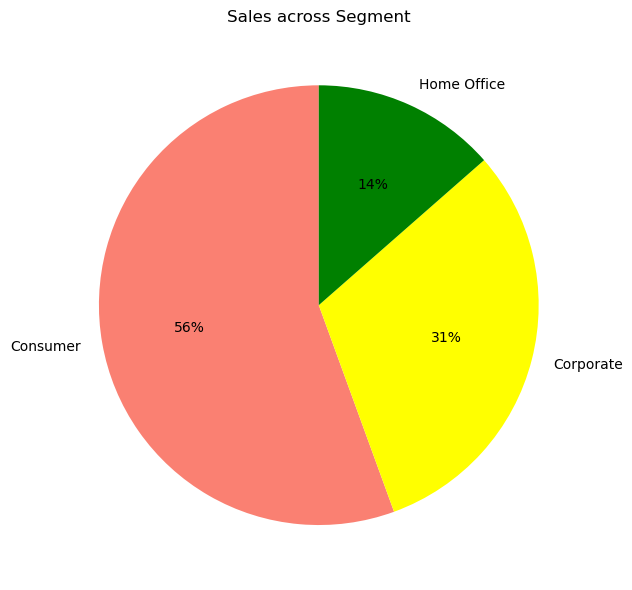

In [11]:
plt.figure(figsize = (10, 6))

plt.pie(df_pie, labels = df_pie.index, autopct = '%1.f%%', startangle = 90, colors = ['salmon', 'yellow', 'green'])

plt.title('Sales across Segment')
plt.tight_layout()

### Bar chart

In [12]:
df['Category'].unique()

array(['Technology', 'Office Supplies', 'Furniture'], dtype=object)

Text(0.5, 1.0, 'Sales as per Categories of Product')

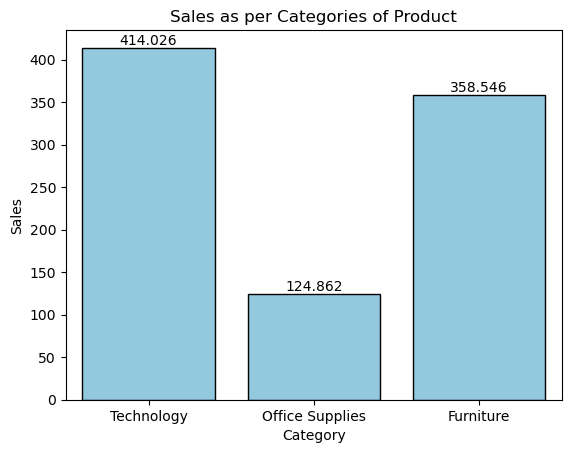

In [13]:
b = sns.barplot(x = 'Category', y = 'Sales', data = df, ci = False, color = 'skyblue', edgecolor = 'black')

for bar in b.containers:
    b.bar_label(bar)
    
plt.title('Sales as per Categories of Product')
    


### Box plot

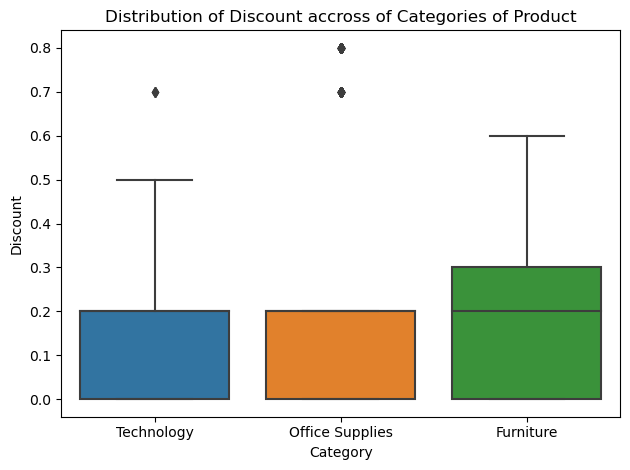

In [14]:
sns.boxplot(x = 'Category', y = 'Discount', data = df)

plt.title('Distribution of Discount accross of Categories of Product')
plt.tight_layout()

### Area chart

In [15]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
1469,1470,CA-2017-102925,05-11-2017,10-11-2017,Second Class,CD-12280,Christina DeMoss,Consumer,United States,New York City,New York,10024,East,TEC-PH-10001448,Technology,Phones,Anker Astro 15000mAh USB Portable Charger,99.98,2,0.0


In [16]:
df['Region'].unique()

array(['West', 'East', 'Central', 'South'], dtype=object)

In [17]:
df_area = df.groupby(['Region', 'Category'])['Quantity'].sum().unstack()
df_area

Category,Furniture,Office Supplies,Technology
Region,,,
Central,425,1137,319
East,451,1362,368
South,255,744,193
West,471,1328,521


<Figure size 1000x600 with 0 Axes>

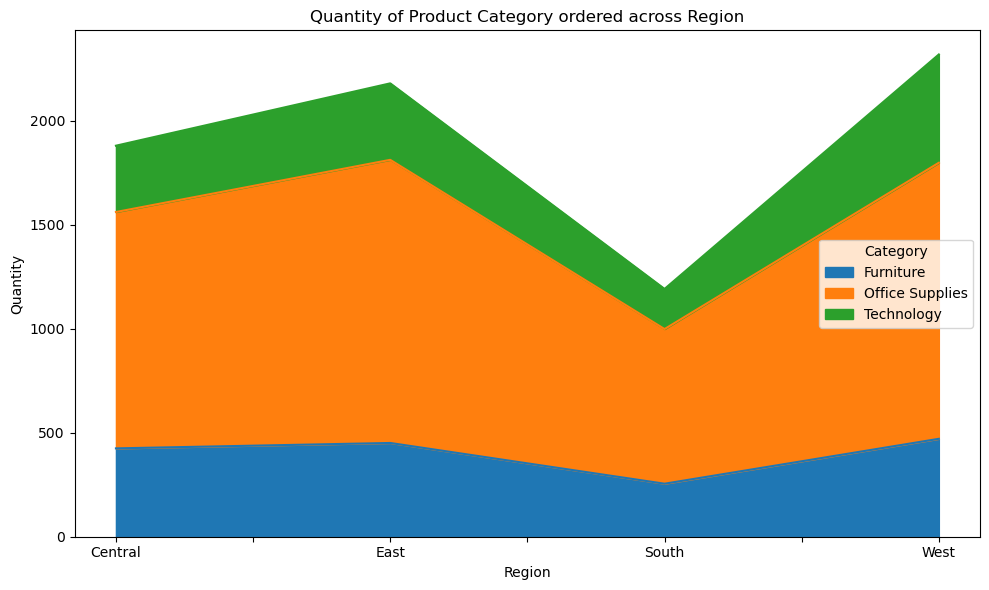

In [18]:
plt.figure(figsize = (10, 6))

df_area.plot.area(figsize = (10, 6))

plt.title('Quantity of Product Category ordered across Region')
plt.ylabel('Quantity')

plt.tight_layout()

### Line chart

In [19]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount
867,868,CA-2016-158260,04-11-2016,08-11-2016,Standard Class,CC-12475,Cindy Chapman,Consumer,United States,San Diego,California,92037,West,TEC-MA-10003176,Technology,Machines,Okidata B400 Printer,686.4,2,0.2


In [20]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [21]:
df['ship_year'] = df['Ship Date'].dt.year

In [27]:
df['ship_year'] = df['ship_year'].astype('category')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         1993 non-null   int64         
 1   Order ID       1993 non-null   object        
 2   Order Date     1993 non-null   object        
 3   Ship Date      1993 non-null   datetime64[ns]
 4   Ship Mode      1993 non-null   object        
 5   Customer ID    1993 non-null   object        
 6   Customer Name  1993 non-null   object        
 7   Segment        1993 non-null   object        
 8   Country        1993 non-null   object        
 9   City           1993 non-null   object        
 10  State          1993 non-null   object        
 11  Postal Code    1993 non-null   int64         
 12  Region         1993 non-null   object        
 13  Product ID     1993 non-null   object        
 14  Category       1993 non-null   object        
 15  Sub-Category   1993 n

In [29]:
df_line = df.groupby(['ship_year'])['Quantity'].sum()
df_line

ship_year
2014    1437
2015    1676
2016    2057
2017    2395
2018       9
Name: Quantity, dtype: int64

Text(0, 0.5, 'Quantity')

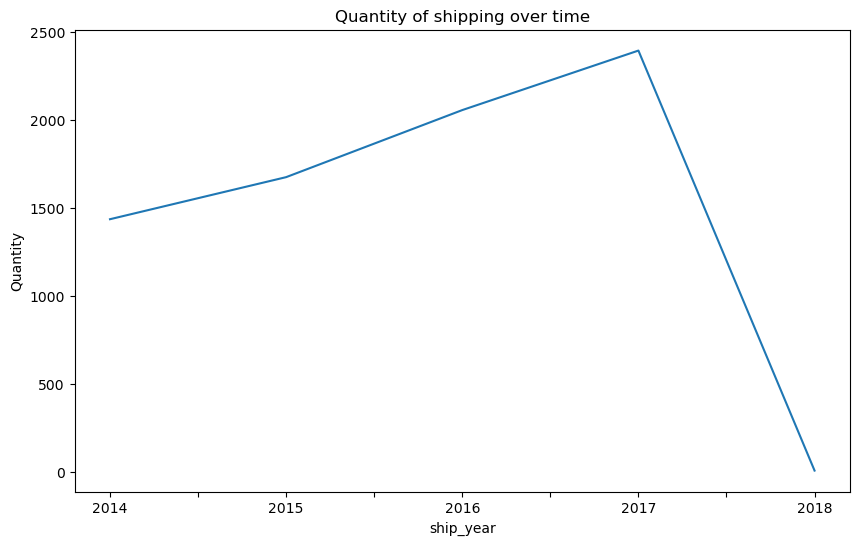

In [31]:
plt.figure(figsize = (10, 6))

df_line.plot.line(figsize = (10, 6))

plt.title('Quantity of shipping over time')
plt.ylabel('Quantity')

### Histogram

Text(0.5, 1.0, 'Distribution of Quantity')

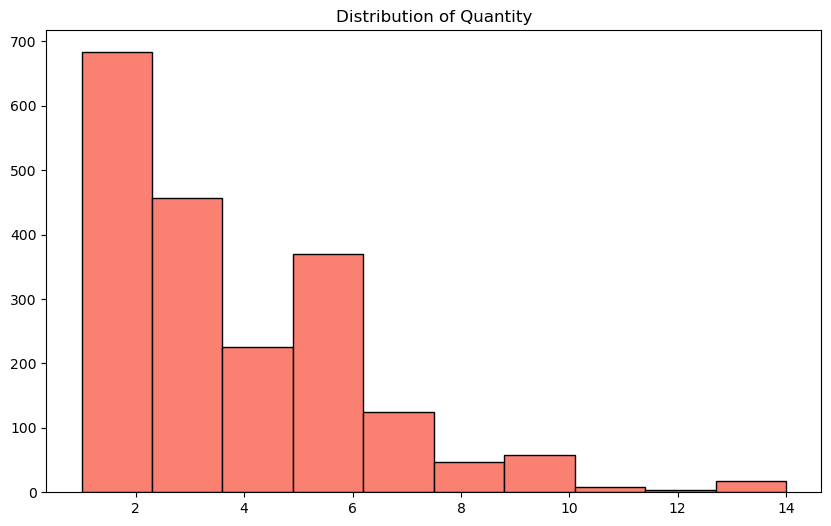

In [34]:
plt.figure(figsize = (10, 6))

plt.hist(df['Quantity'], bins = 10, color = 'salmon', edgecolor = 'black')

plt.title('Distribution of Quantity')

### Scatter plot

In [37]:
df.sample()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,ship_year
298,299,US-2014-103338,11-03-2014,2014-03-15,Standard Class,RB-19435,Richard Bierner,Consumer,United States,Roseville,...,95661,West,OFF-AR-10001770,Office Supplies,Art,Economy #2 Pencils,7.98,3,0.0,2014


Text(0, 0.5, 'Discount')

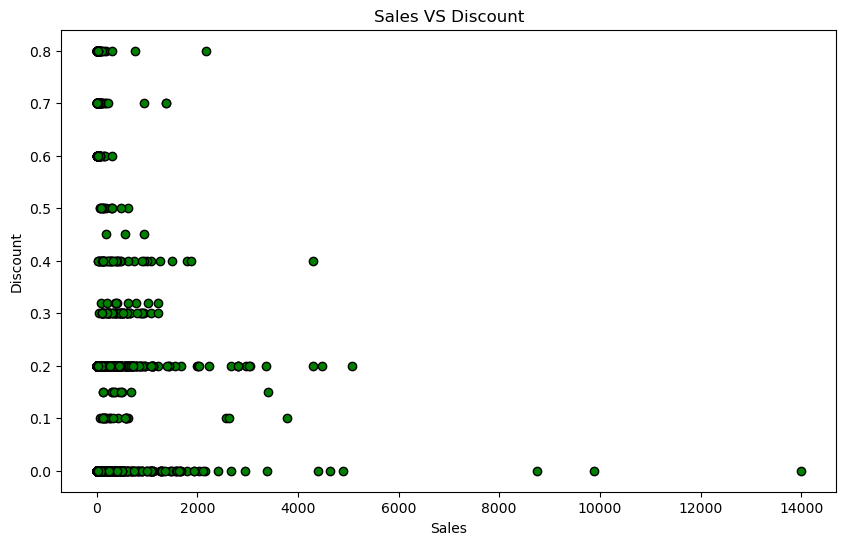

In [39]:
plt.figure(figsize = (10, 6))

plt.scatter(df['Sales'], df['Discount'], color = 'green', edgecolor = 'black')

plt.title('Sales VS Discount')
plt.xlabel('Sales')
plt.ylabel('Discount')